**Datasets**


In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
shopping_data = pd.read_csv('shopping_behavior_updated.csv')
shopping_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


**Splitting variables explored in our projects**

In [18]:
previous_purchase = pd.DataFrame(shopping_data[["Previous Purchases"]])
age_data = pd.DataFrame(shopping_data[["Age"]])
purchase_amount = pd.DataFrame(shopping_data[["Purchase Amount (USD)"]])
review_rating = pd.DataFrame(shopping_data[["Review Rating"]])

**Splitting dataset of categories**

In [12]:
clothing_data = shopping_data[shopping_data['Category'] == 'Clothing']
footwear_data = shopping_data[shopping_data['Category'] == 'Footwear']
outerwear_data = shopping_data[shopping_data['Category'] == 'Outerwear']
accessories_data = shopping_data[shopping_data['Category'] == 'Accessories']

**Data Visualisation for each variables used**

<Axes: ylabel='Count'>

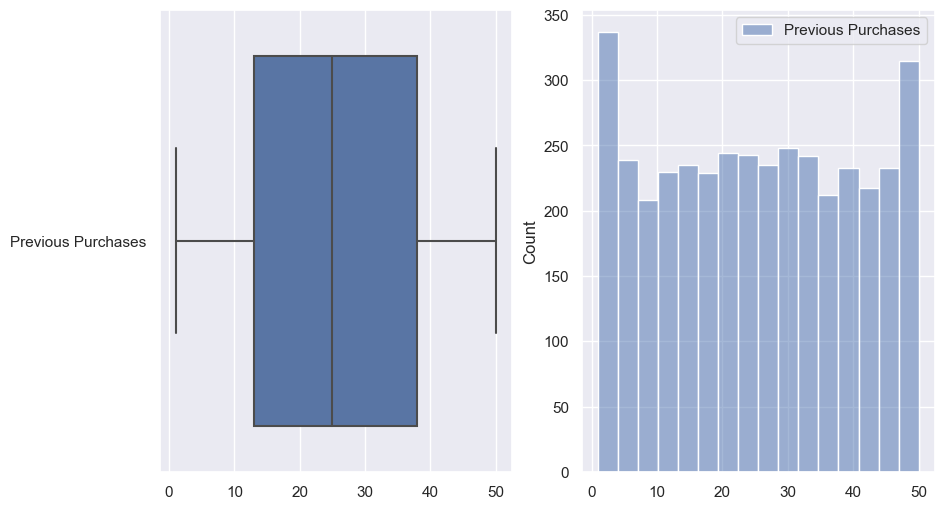

In [8]:
f, axes = plt.subplots(1, 2, figsize=(10, 6))
sb.boxplot(data = previous_purchase, orient = "h", ax = axes[0])
sb.histplot(data = previous_purchase, ax = axes[1])

<Axes: ylabel='Count'>

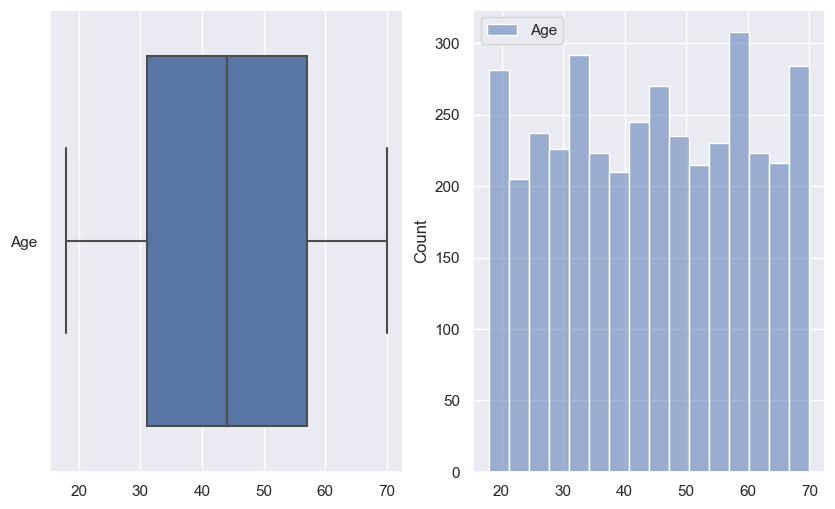

In [9]:
f, axes = plt.subplots(1, 2, figsize=(10, 6))
sb.boxplot(data = age_data, orient = "h", ax = axes[0])
sb.histplot(data = age_data, ax = axes[1])

<Axes: ylabel='Count'>

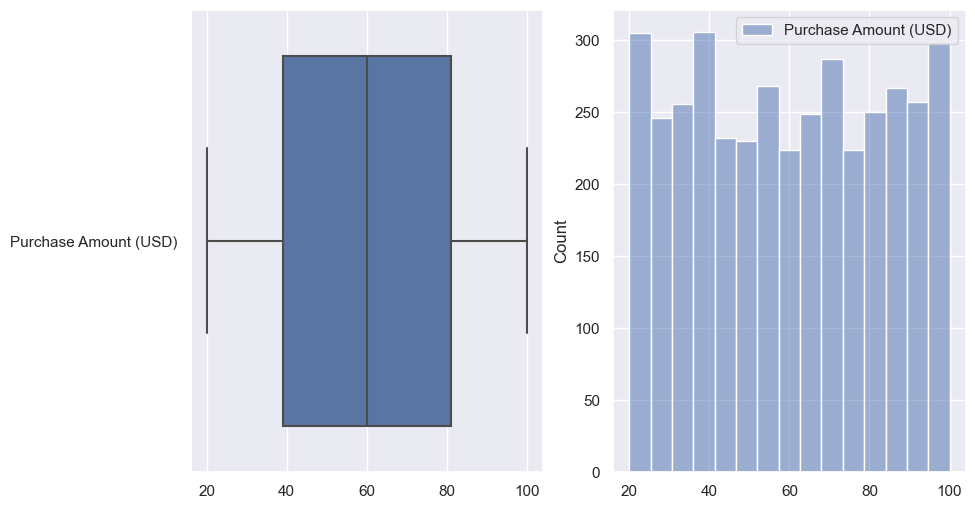

In [10]:
f, axes = plt.subplots(1, 2, figsize=(10, 6))
sb.boxplot(data = purchase_amount, orient = "h", ax = axes[0])
sb.histplot(data = purchase_amount, ax = axes[1])

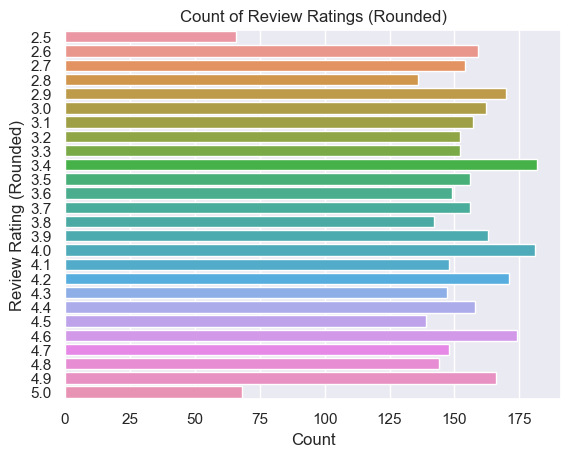

In [6]:
sb.countplot(y='Review Rating', data=review_rating)

# Add titles and labels
plt.title('Count of Review Ratings (Rounded)')
plt.xlabel('Count')
plt.ylabel('Review Rating (Rounded)')

# Show plot
plt.show()

count         3900
unique           4
top       Clothing
freq          1737
Name: Category, dtype: object

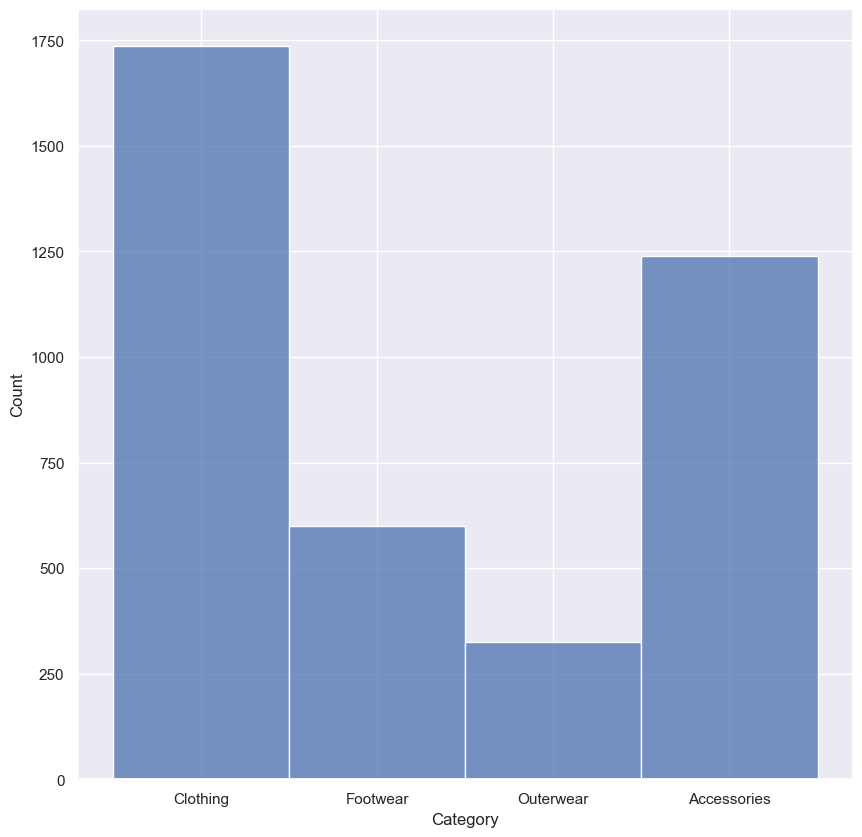

In [27]:
f = plt.figure(figsize = (10, 10))
sb.histplot(shopping_data['Category'], stat = 'count')
shopping_data['Category'].describe()

**Data Cleaning for Review Rating**

In [16]:
review_rating = pd.DataFrame(shopping_data[["Review Rating"]])
def custom_round(x):
    if x % 1 > 0.5:
        return int(x) + 1
    else:
        return int(x)
review_rating2 = review_rating['Review Rating'].apply(custom_round)

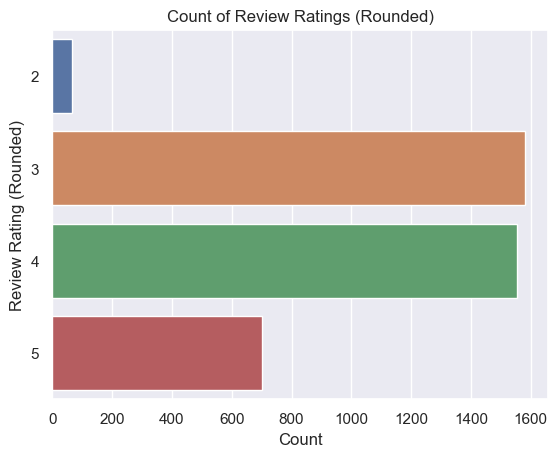

In [17]:
review_rating = pd.DataFrame(shopping_data[["Review Rating"]])
def custom_round(x):
    if x % 1 > 0.5:
        return int(x) + 1
    else:
        return int(x)
review_rating['Review Rating Rounded'] = review_rating['Review Rating'].apply(custom_round)

sb.countplot(y='Review Rating Rounded', data=review_rating)

# Add titles and labels
plt.title('Count of Review Ratings (Rounded)')
plt.xlabel('Count')
plt.ylabel('Review Rating (Rounded)')

# Show plot
plt.show()

For review rating from lower range of 0.0-0.4 will be rounded down while from 0.5-0.9 will be rounded up to the next value.

We changed review rating to categorical variable so that it will be readable in data visualisation and data exploration. In general, all of the data is good to go and only a small cleaning is needed for review ratings.

**Data exploration for variables against review rating**

<Axes: xlabel='Previous Purchases', ylabel='Review Rating'>

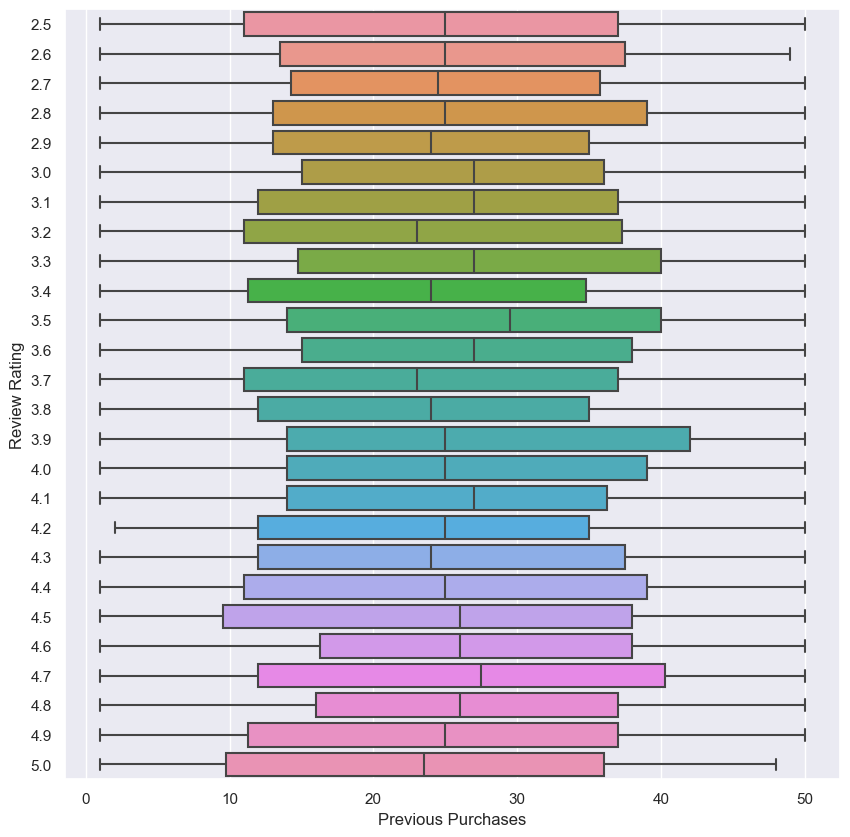

In [19]:
trainDF = pd.concat([previous_purchase, review_rating], axis = 1).reindex(previous_purchase.index)
f = plt.figure(figsize=(10, 10))
sb.boxplot(x = "Previous Purchases", y = "Review Rating", data = trainDF, orient = "h")

Before cleaning review rating for previous

<Axes: xlabel='Previous Purchases', ylabel='Review Rating'>

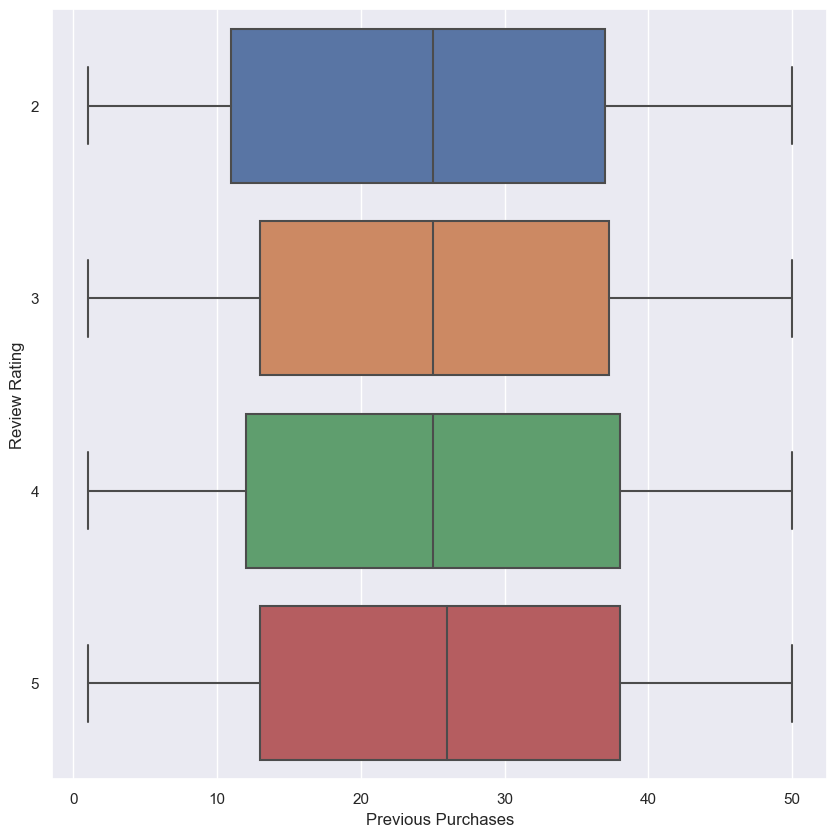

In [20]:
trainDF = pd.concat([previous_purchase, review_rating2], axis = 1).reindex(previous_purchase.index)
f = plt.figure(figsize=(10, 10))
sb.boxplot(x = "Previous Purchases", y = "Review Rating", data = trainDF, orient = "h")

After cleaning review rating for purchase amount

<Axes: xlabel='Age', ylabel='Review Rating'>

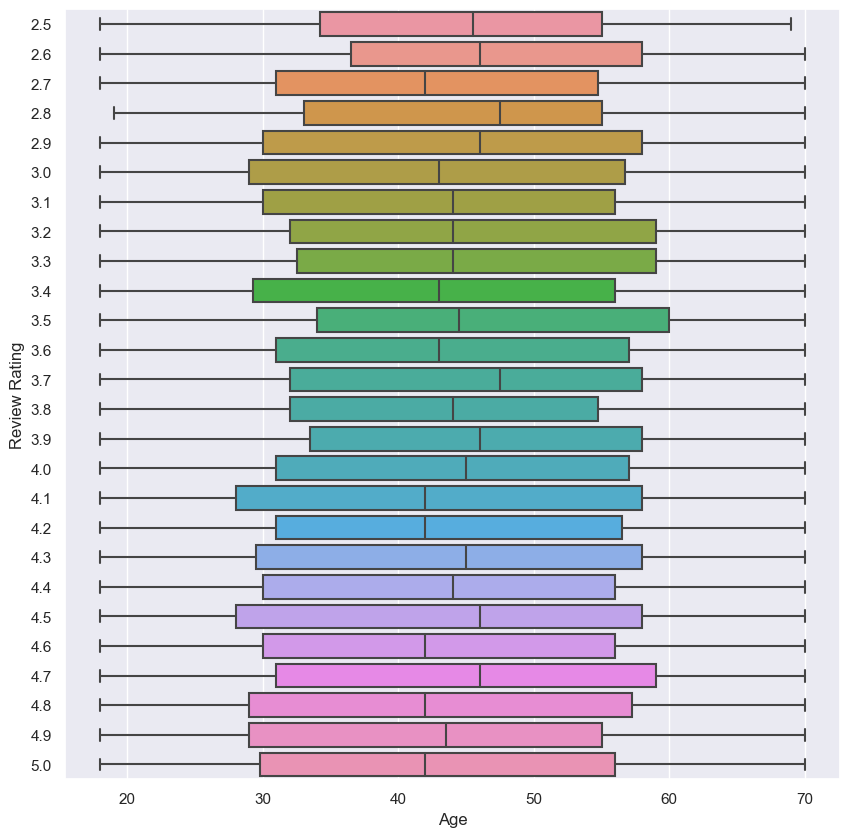

In [21]:
trainDF = pd.concat([age_data, review_rating], axis = 1).reindex(age_data.index)
f = plt.figure(figsize=(10, 10))
sb.boxplot(x = "Age", y = "Review Rating", data = trainDF, orient = "h")

Before cleaning review rating for age

<Axes: xlabel='Age', ylabel='Review Rating'>

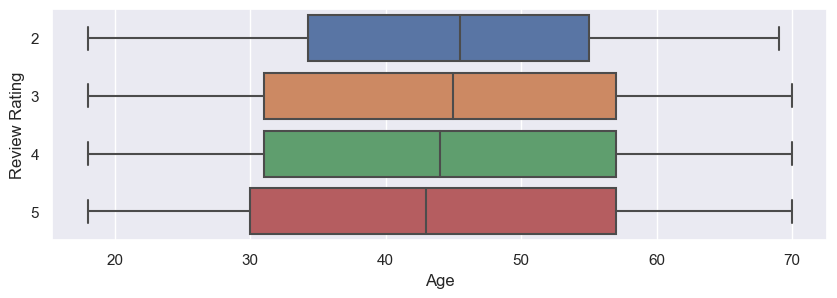

In [22]:
trainDF = pd.concat([age_data, review_rating2], axis = 1).reindex(age_data.index)
f = plt.figure(figsize=(10, 3))
sb.boxplot(x = "Age", y = "Review Rating", data = trainDF, orient = "h")

After cleaning review rating for age

<Axes: xlabel='Purchase Amount (USD)', ylabel='Review Rating'>

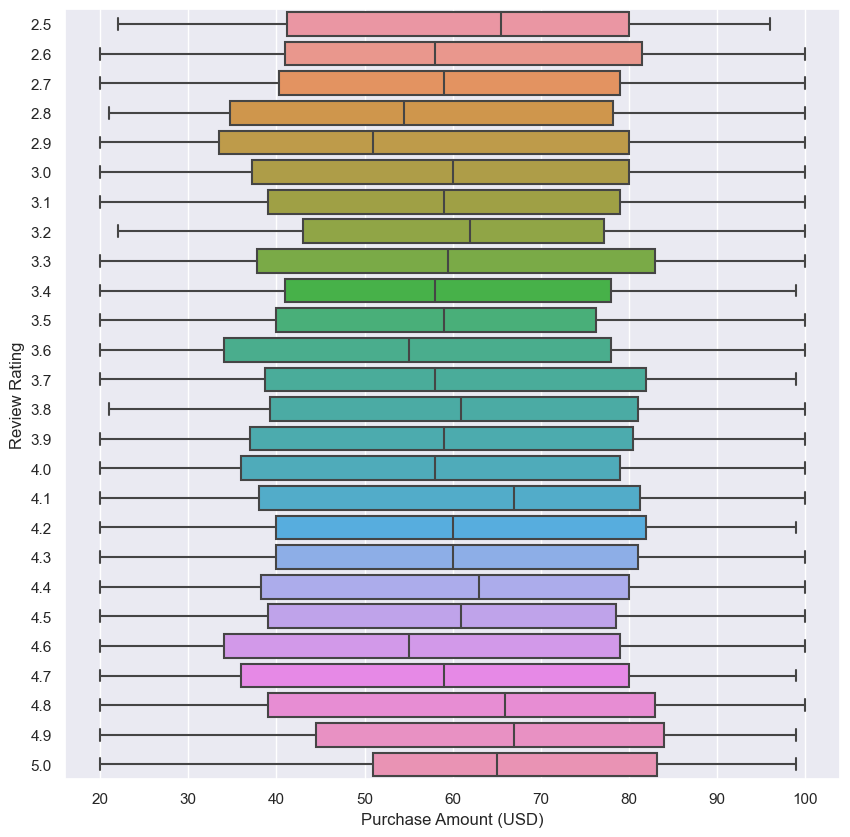

In [23]:
trainDF = pd.concat([purchase_amount, review_rating], axis = 1).reindex(purchase_amount.index)
f = plt.figure(figsize=(10, 10))
sb.boxplot(x = "Purchase Amount (USD)", y = "Review Rating", data = trainDF, orient = "h")

Before cleaning review rating for purchase amount

<Axes: xlabel='Purchase Amount (USD)', ylabel='Review Rating'>

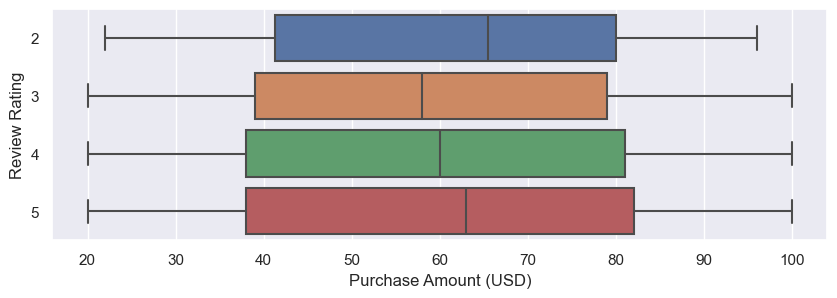

In [25]:
trainDF = pd.concat([purchase_amount, review_rating2], axis = 1).reindex(purchase_amount.index)
f = plt.figure(figsize=(10, 3))
sb.boxplot(x = "Purchase Amount (USD)", y = "Review Rating", data = trainDF, orient = "h")

After cleaning review rating for purchase amount

<Axes: xlabel='Category', ylabel='Review Rating'>

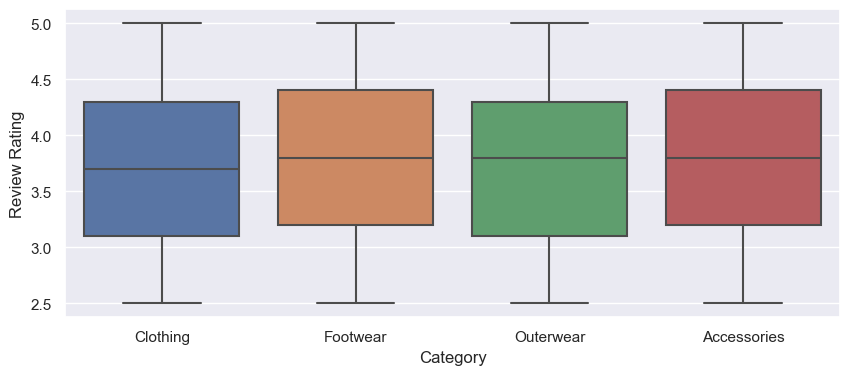

In [29]:
f, axes = plt.subplots(1,1 , figsize=(10, 4))
sb.boxplot(x= "Category", y= "Review Rating", data=shopping_data)

Data Visualisation for different categories against review rating

**Machine Learning Exploration**

**Decision Tree and Heatmap**

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4464957264957265

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.39076923076923076



<Axes: >

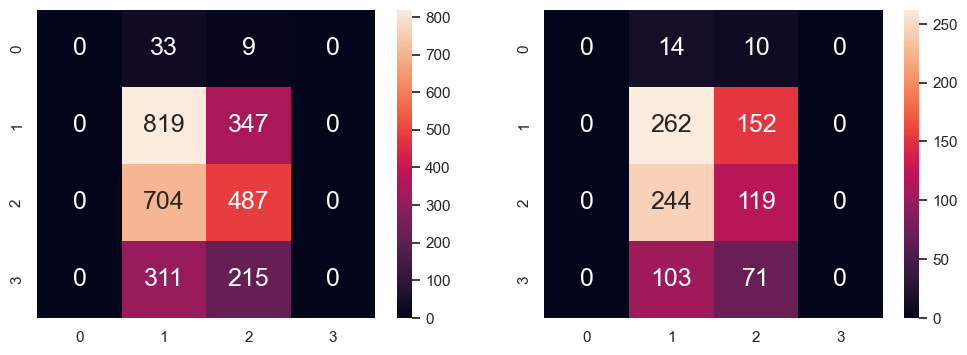

In [33]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = review_rating2
X = pd.DataFrame(shopping_data[["Purchase Amount (USD)", "Age", "Previous Purchases"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)# create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

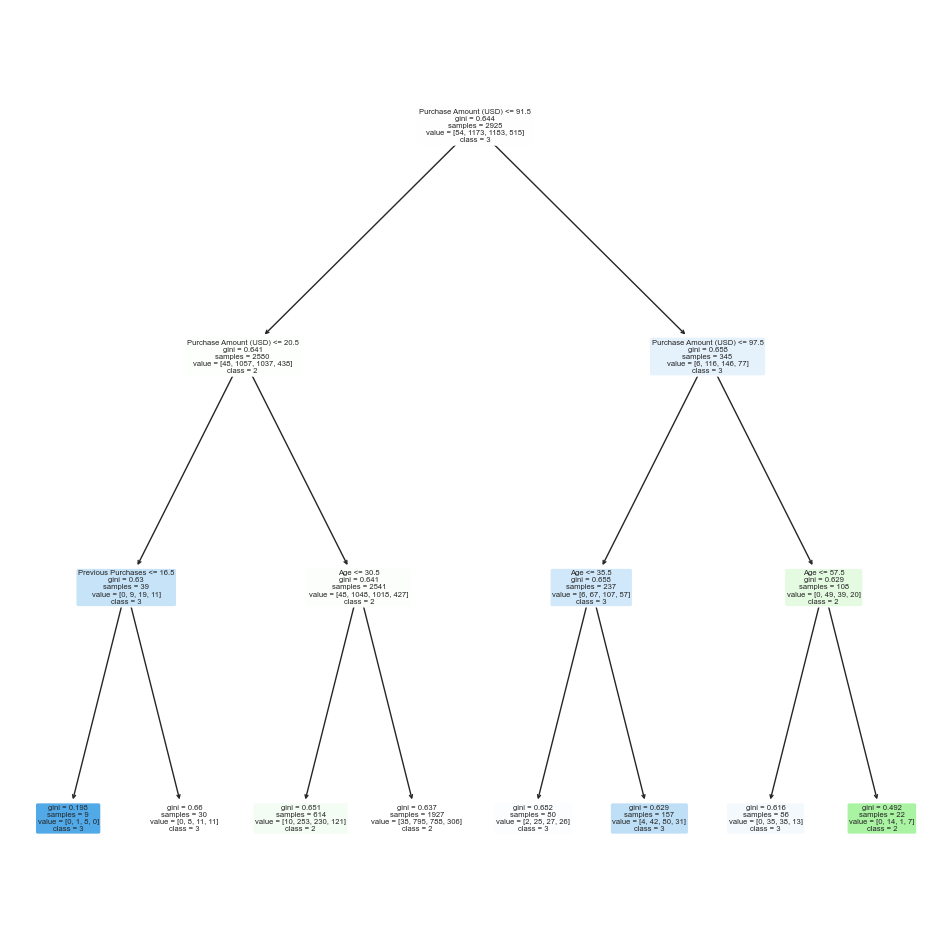

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12,12))
plot_tree(dectree, 
          filled=True, 
          rounded=True, 
          feature_names=["Purchase Amount (USD)", "Age", "Previous Purchases"],
          class_names=["1","2","3","4","5"])
plt.show()

**Machine Learning Technique: Random Forest**

In [42]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

from sklearn.datasets import make_classification
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

y = review_rating2
X = pd.DataFrame(shopping_data[["Purchase Amount (USD)", "Age", "Previous Purchases"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.614017094017094

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.39794871794871794



<Axes: >

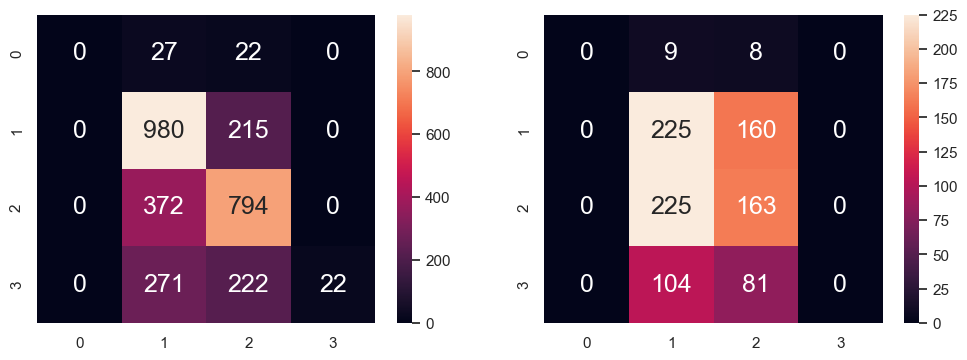

In [43]:
dectree = RandomForestClassifier(max_depth = 7)# create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

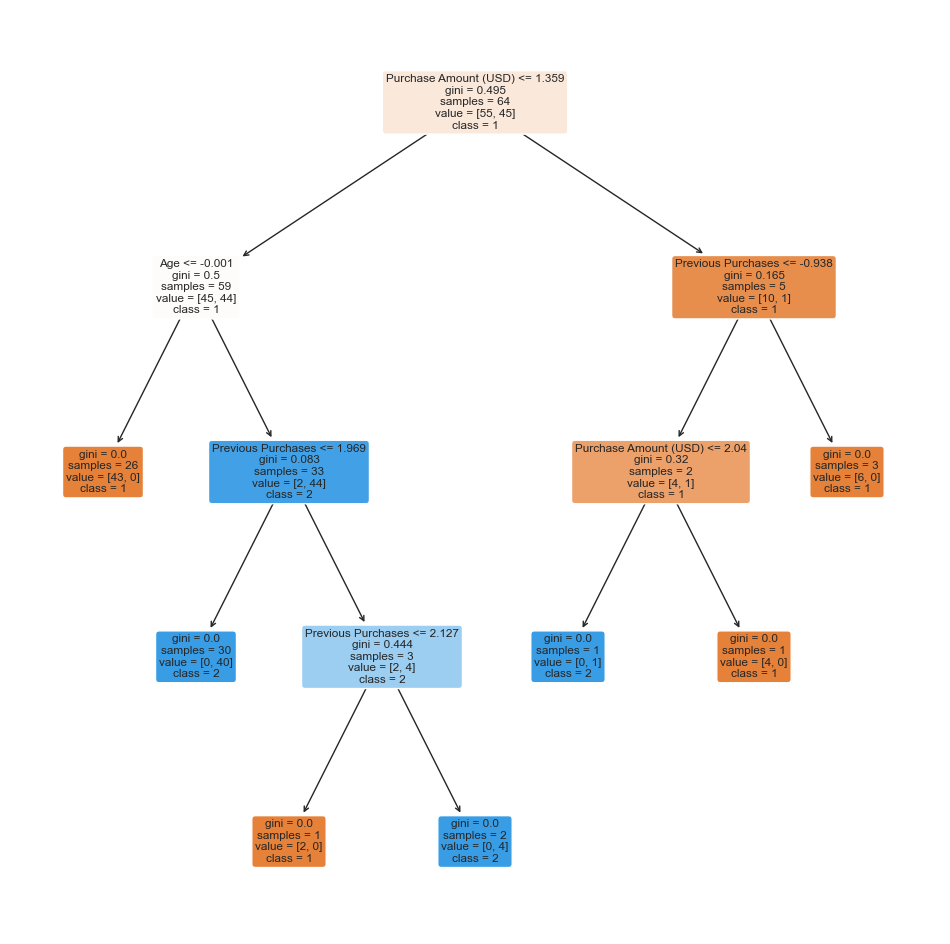

In [44]:
# Generate some dummy data
X, y = make_classification(n_samples=100, n_features=3, n_classes=2, 
                           n_clusters_per_class=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, random_state=42)




# Create and train a random forest classifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X, y)

# Check if there are decision trees in the random forest
if len(rf.estimators_) > 0:
    # Extracting one of the decision trees from the random forest
    dectree = rf.estimators_[0]  # Assuming 'rf' is your trained random forest classifier

    # Now you can use plot_tree with this individual decision tree
    f = plt.figure(figsize=(12,12))
    plot_tree(dectree, 
              filled=True, 
              rounded=True, 
              feature_names=["Purchase Amount (USD)", "Age", "Previous Purchases"],
              class_names=["1","2","3","4","5"])
    plt.show()
else:
    print("The random forest classifier does not contain any decision trees.")
